In [2]:
import pandas as pd
import matplotlib.pyplot as plt


#for mapping
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
import geoplot


In [3]:
df617_underway = pd.read_csv("https://nes-lter-data.whoi.edu/api/underway/en617.csv")
df617_underway.head()
list(df617_underway.columns)


['date',
 'datetime_unix',
 'datetime_decimaldoy',
 'gps_furuno_utcoffix',
 'gps_furuno_latitude',
 'gps_furuno_longitude',
 'gps_furuno_quality',
 'gps_furuno_satsinuse',
 'gps_furuno_hdop',
 'gps_furuno_diffage',
 'gps_furuno_tmg',
 'gps_furuno_smg',
 'gps_garmin741_utcoffix',
 'gps_garmin741_latitude',
 'gps_garmin741_longitude',
 'gps_garmin741_quality',
 'gps_garmin741_satsinuse',
 'gps_garmin741_hdop',
 'gps_garmin741_diffage',
 'gps_garmin741_tmg',
 'gps_garmin741_smg',
 'gps_nstarwaas_utcoffix',
 'gps_nstarwaas_latitude',
 'gps_nstarwaas_longitude',
 'gps_nstarwaas_quality',
 'gps_nstarwaas_satsinuse',
 'gps_nstarwaas_hdop',
 'gps_nstarwaas_diffage',
 'gps_nstarwaas_tmg',
 'gps_nstarwaas_smg',
 'gps_spectracom_utcoffix',
 'gps_spectracom_latitude',
 'gps_spectracom_longitude',
 'gps_spectracom_quality',
 'gps_spectracom_satsinuse',
 'gps_spectracom_hdop',
 'gps_spectracom_diffage',
 'gps_spectracom_utc',
 'gps_spectracom_year',
 'gnss_adu2_utcoffix',
 'gnss_adu2_latitude',
 'gn

In [4]:
nes = gpd.read_file("/D/MIT-WHOI/data/2021/lme/lme.shp")

geometry = [Point(xy) for xy in zip(df617_underway["gps_furuno_longitude"],df617_underway["gps_furuno_latitude"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df617_underway,crs =crs,geometry =geometry)

geo_df.head()

print(list(geo_df))

['date', 'datetime_unix', 'datetime_decimaldoy', 'gps_furuno_utcoffix', 'gps_furuno_latitude', 'gps_furuno_longitude', 'gps_furuno_quality', 'gps_furuno_satsinuse', 'gps_furuno_hdop', 'gps_furuno_diffage', 'gps_furuno_tmg', 'gps_furuno_smg', 'gps_garmin741_utcoffix', 'gps_garmin741_latitude', 'gps_garmin741_longitude', 'gps_garmin741_quality', 'gps_garmin741_satsinuse', 'gps_garmin741_hdop', 'gps_garmin741_diffage', 'gps_garmin741_tmg', 'gps_garmin741_smg', 'gps_nstarwaas_utcoffix', 'gps_nstarwaas_latitude', 'gps_nstarwaas_longitude', 'gps_nstarwaas_quality', 'gps_nstarwaas_satsinuse', 'gps_nstarwaas_hdop', 'gps_nstarwaas_diffage', 'gps_nstarwaas_tmg', 'gps_nstarwaas_smg', 'gps_spectracom_utcoffix', 'gps_spectracom_latitude', 'gps_spectracom_longitude', 'gps_spectracom_quality', 'gps_spectracom_satsinuse', 'gps_spectracom_hdop', 'gps_spectracom_diffage', 'gps_spectracom_utc', 'gps_spectracom_year', 'gnss_adu2_utcoffix', 'gnss_adu2_latitude', 'gnss_adu2_longitude', 'gnss_adu2_heading', 

In [5]:
#set date range
start_date = '2000-01-01'
end_date = '2021-01-01'

mask = (geo_df['date'] >= start_date) & (geo_df['date'] <= end_date)

Text(0.5, 1.0, 'EN617 SST (Deg C)')

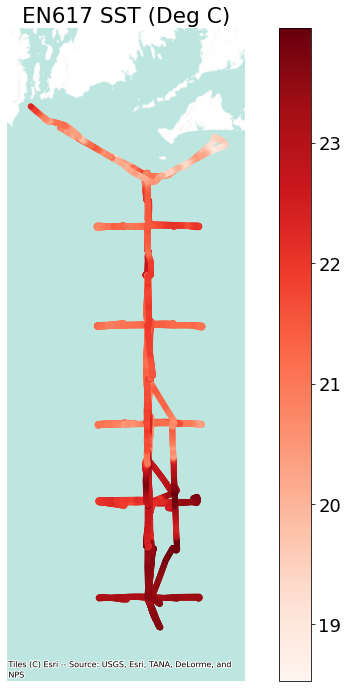

In [6]:
font = {'weight':'normal','size': 18}

plt.rc('font',**font)
ax = geoplot.webmap(nes,project = geoplot.crs.AlbersEqualArea(),figsize = (12,12))
geoplot.pointplot(geo_df.loc[mask],
                  hue = 'tsg1_temperature',
                  cmap = 'Reds',
                  ax = ax,
                  legend = True,
                 legend_var = 'hue',s = 5)
ctx.add_basemap(ax,source =ctx.providers.Esri.WorldTerrain )
plt.title("EN617 SST (Deg C)")

In [11]:
dfbiovol = pd.read_csv("/D/MIT-WHOI/github_repos/preliminary_data/data/transect/dfbiovolume.csv")
dfbiovol = dfconc.iloc[: , 1:]
dfbiovol.head()
# list(dfconc.columns)

,Acanthoica_quattrospina,Akashiwo,Alexandrium_catenella,Amphidinium,Amylax,Apedinella,Asterionellopsis_glacialis,Bacillaria,Bacillariophyceae,Bacteriastrum,...,mix,pennate,pennate_Pseudo-nitzschia,pennate_Thalassionema,pennate_morphotype1,pollen,shellfish_larvae,square_unknown,unknown2,zooplankton
0,0.0,0.0,0.000000,0.0,0.0,0.0,17327.623487,0.000000,234.816719,0.0,...,596.386045,1540.961950,0.0,0.0,0.0,0.0,0.0,212.295411,0.000000,0.0
1,0.0,0.0,27798.153316,0.0,0.0,0.0,5396.760174,111265.506441,1053.236190,0.0,...,0.000000,603.084998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,3084.709109,0.000000,16.629970,0.0,...,19785.265605,2141.027510,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,11320.999243,128.037559,0.0,...,7600.132614,354.594419,0.0,0.0,0.0,0.0,0.0,0.000000,38498.953935,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,8564.783336,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [13]:
dfmetadata = pd.read_csv("/D/MIT-WHOI/github_repos/preliminary_data/data/transect/dfmetadata.csv")
dfmetadata.head()

,Unnamed: 0,sample_time,sample_type,ml_analyzed,cruise,tag1,skip
0,0,2017-05-03 14:17:52+00:00,NaN,4.064688,NaN,NaN,0.0
1,1,2017-05-03 15:00:01+00:00,NaN,4.548277,NaN,NaN,0.0
2,2,2017-05-03 15:04:59+00:00,NaN,0.131108,NaN,NaN,0.0
3,3,2017-05-03 15:11:36+00:00,NaN,0.123459,NaN,NaN,0.0
4,4,2017-05-03 15:17:42+00:00,NaN,1.231301,NaN,NaN,0.0


In [15]:
biovol = dfbiovol.mul(dfmetadata["ml_analyzed"],axis = 0)

In [92]:
dfcounts = dfconc.loc[:,'Acanthoica_quattrospina':'zooplankton'].mul(dfconc.loc[:,'ml_analyzed'],axis = 0)
# print(dfcounts)
dftotalcounts = pd.concat([dfconc["datetime"],dfconc['ml_analyzed'],dfconc['latitude'],dfconc['longitude'],dfcounts],axis = 1)
dftotalcounts.head()

,datetime,ml_analyzed,latitude,longitude,Acanthoica_quattrospina,Akashiwo,Alexandrium_catenella,Amphidinium,Amylax,Apedinella,...,flagellate_morphotype3,foraminifera,mix,pennate,pennate_morphotype1,pollen,square_unknown,unknown1,unknown2,zooplankton
0,31-Jan-2018 13:29:28,0.911473,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31-Jan-2018 13:32:15,1.236882,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,255.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31-Jan-2018 17:43:21,4.083556,41.2125,-70.9224,0.0,0.0,0.0,1.0,0.0,1.0,...,7.0,0.0,607.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31-Jan-2018 18:06:20,4.194647,41.1975,-70.8792,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,647.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31-Jan-2018 18:25:34,4.004953,41.1948,-70.8771,0.0,0.0,1.0,0.0,0.0,0.0,...,42.0,0.0,831.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
dflong = dftotalcounts.melt(id_vars = ['datetime','ml_analyzed',''],var_name = "species",value_name="count")#converting from wide to long
dflong["datetime"] = pd.to_datetime(dflong["datetime"],format='%d-%b-%Y %H:%M:%S')
print(dflong.head())

clist = pd.read_csv('/D/MIT-WHOI/data/2021/IFCB_classlist_type.csv') #importing classlist type maps species to functional groups e.g. diatoms, dinoflagellates
clist.long = pd.melt(clist,id_vars = ['CNN_classlist'], var_name = 'group',value_name='present') #converting to long version
clist.long = clist.long.rename(columns = {"CNN_classlist":'species','in_out':'present'}) #renaming columns to species and presense
clist.long = clist.long[clist.long['present']==1] #isolating present
clist.long.head()

dflong = dflong.join(clist.long.set_index('species'),on = 'species')
print(dflong.group.unique())
print(dflong.head())
dfgrouped = dflong.groupby(['datetime','group']).sum().reset_index()
dfgrouped["count/mL"]=dfgrouped["count"]/dfgrouped["ml_analyzed"]
dfgrouped

             datetime  ml_analyzed                  species  count
0 2018-01-31 13:29:28     0.911473  Acanthoica_quattrospina    0.0
1 2018-01-31 13:32:15     1.236882  Acanthoica_quattrospina    0.0
2 2018-01-31 17:43:21     4.083556  Acanthoica_quattrospina    0.0
3 2018-01-31 18:06:20     4.194647  Acanthoica_quattrospina    1.0
4 2018-01-31 18:25:34     4.004953  Acanthoica_quattrospina    0.0
['Coccolithophore' 'Nano' 'Dinoflagellate' 'flagellate' 'Diatom'
 'pennatediatom' 'Ciliate' 'Other live' 'IFCB artifact' 'Other not alive']
             datetime  ml_analyzed                  species  count  \
0 2018-01-31 13:29:28     0.911473  Acanthoica_quattrospina    0.0   
0 2018-01-31 13:29:28     0.911473  Acanthoica_quattrospina    0.0   
1 2018-01-31 13:32:15     1.236882  Acanthoica_quattrospina    0.0   
1 2018-01-31 13:32:15     1.236882  Acanthoica_quattrospina    0.0   
2 2018-01-31 17:43:21     4.083556  Acanthoica_quattrospina    0.0   

             group  present  
0  Cocc

,datetime,group,ml_analyzed,count,present,count/mL
0,2018-01-31 13:29:28,Ciliate,25.521251,2.0,28.0,0.078366
1,2018-01-31 13:29:28,Coccolithophore,7.291786,0.0,8.0,0.000000
2,2018-01-31 13:29:28,Diatom,44.662190,32.0,49.0,0.716490
3,2018-01-31 13:29:28,Dinoflagellate,26.432725,13.0,29.0,0.491815
4,2018-01-31 13:29:28,IFCB artifact,2.734420,1567.0,3.0,573.064899
...,...,...,...,...,...,...
26755,2018-11-14 12:00:37,Nano,6.530853,432.0,16.0,66.147565
26756,2018-11-14 12:00:37,Other live,4.489961,12.0,11.0,2.672629
26757,2018-11-14 12:00:37,Other not alive,2.040891,45.0,5.0,22.049188
26758,2018-11-14 12:00:37,flagellate,6.530853,104.0,16.0,15.924414


In [ ]:


geometry_conc = [Point(xy) for xy in zip(dfconc["longitude"],df617_underway["latitude"])]
crs = {'init':'epsg:4326'}
geo_conc = gpd.GeoDataFrame(dfconc,crs =crs,geometry =geometry_conc)

geo_conc.head()

print(list(geo_df))